# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [8]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...


In [9]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("/content/BA_reviews.csv")

In [12]:
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | Top Ten REASONS to not use Brit...
1,1,Not Verified | Easy check in on the way to He...
2,2,✅ Trip Verified | Online check in worked fine...
3,3,✅ Trip Verified |. The BA first lounge at Term...
4,4,Not Verified | Paid a quick visit to Nice yest...


## Data Cleaning

In [13]:
df.info() # checking datatypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [14]:
df.describe() # getting statistical values from dataset

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [15]:
df.isnull().sum() #checking number of null values 

Unnamed: 0    0
reviews       0
dtype: int64

In [16]:
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified', '') #str.replace() function to replace all occurrences of the word "not" with an empty string.

In [17]:
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | Top Ten REASONS to not use Brit...
1,1,Not Verified | Easy check in on the way to He...
2,2,| Online check in worked fine. Quick securit...
3,3,|. The BA first lounge at Terminal 5 was a z...
4,4,Not Verified | Paid a quick visit to Nice yest...


In [18]:
df['reviews'] = df['reviews'].str.replace('Not Verified', '')

In [19]:
df['reviews'] = df['reviews'].str.replace('|', '')

<ipython-input-19-ffb3ebf6f386>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['reviews'] = df['reviews'].str.replace('|', '')


In [20]:
df.head(5)

,Unnamed: 0,reviews
0,0,Top Ten REASONS to not use British Airways T...
1,1,Easy check in on the way to Heathrow. The f...
2,2,Online check in worked fine. Quick security...
3,3,. The BA first lounge at Terminal 5 was a zo...
4,4,Paid a quick visit to Nice yesterday from He...


In [21]:
df['reviews'] = df['reviews'].str.strip() # removing blank space, .strip() function removes leading and trailing whitespace from each value

In [22]:
df

,Unnamed: 0,reviews
0,0,Top Ten REASONS to not use British Airways To ...
1,1,Easy check in on the way to Heathrow. The flig...
2,2,Online check in worked fine. Quick security ch...
3,3,. The BA first lounge at Terminal 5 was a zoo...
4,4,Paid a quick visit to Nice yesterday from Heat...
...,...,...
995,995,Aberdeen to Boston via London Heathrow. I foun...
996,996,London to Hamburg. Baggage self-check-in was d...
997,997,Flew London Heathrow to Hong Kong with British...
998,998,Flew to Istanbul with British Airways on 5th J...


## Sentiment Analysis

In [23]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [24]:
sid = SentimentIntensityAnalyzer()


In [25]:
sentiments = []
for review in df['reviews']:
    sentiment_scores = sid.polarity_scores(review)
    sentiment = 'positive' if sentiment_scores['compound'] >= 0 else 'negative'
    sentiments.append(sentiment)
# each review text is passed to the polarity_scores() method of the SentimentIntensityAnalyzer to obtain a sentiment score. 
# The compound score is then used to determine if the sentiment is positive or negative.

In [26]:
df['sentiment'] = sentiments
#This line adds a new column named 'sentiment' to the DataFrame and populates it with the sentiment labels.

In [27]:
df.to_csv('sentiment_analysis_results.csv', index=False)


In [28]:
dfNew = pd.read_csv("/content/sentiment_analysis_results.csv")

In [29]:
dfNew.head(5)

,Unnamed: 0,reviews,sentiment
0,0,Top Ten REASONS to not use British Airways To ...,negative
1,1,Easy check in on the way to Heathrow. The flig...,negative
2,2,Online check in worked fine. Quick security ch...,positive
3,3,. The BA first lounge at Terminal 5 was a zoo...,negative
4,4,Paid a quick visit to Nice yesterday from Heat...,positive


In [30]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

positive    529
negative    471
Name: sentiment, dtype: int64

## Data Visualization

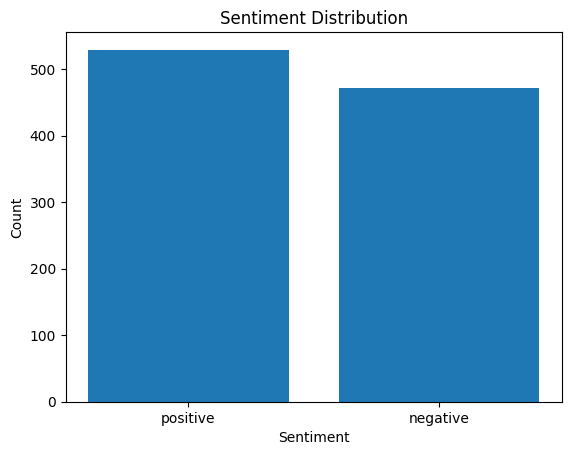

In [31]:
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

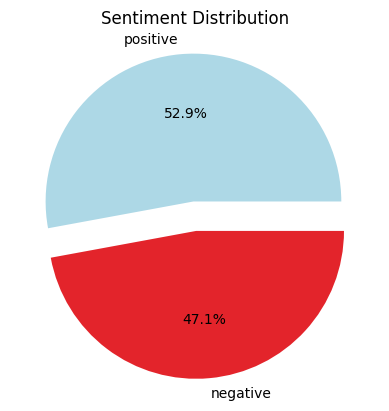

In [32]:
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    colors=['#ADD8E6', '#E3242B'],
    explode=[0.1, 0.1,], 
    autopct='%1.1f%%'
    )
plt.title('Sentiment Distribution')
plt.show()

In [33]:
from wordcloud import WordCloud

In [35]:
text = ' '.join(dfNew['reviews'])

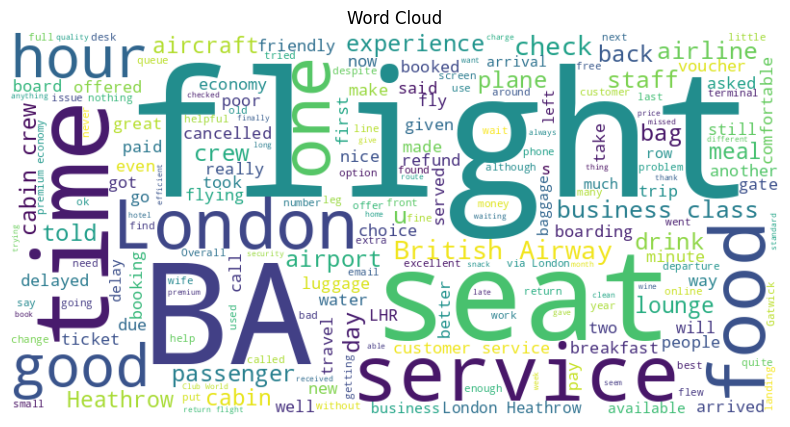

In [36]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()
